# Visualizations

In [1]:
%load_ext autoreload
%autoreload 2

# The TSP example

20_1000_13.png


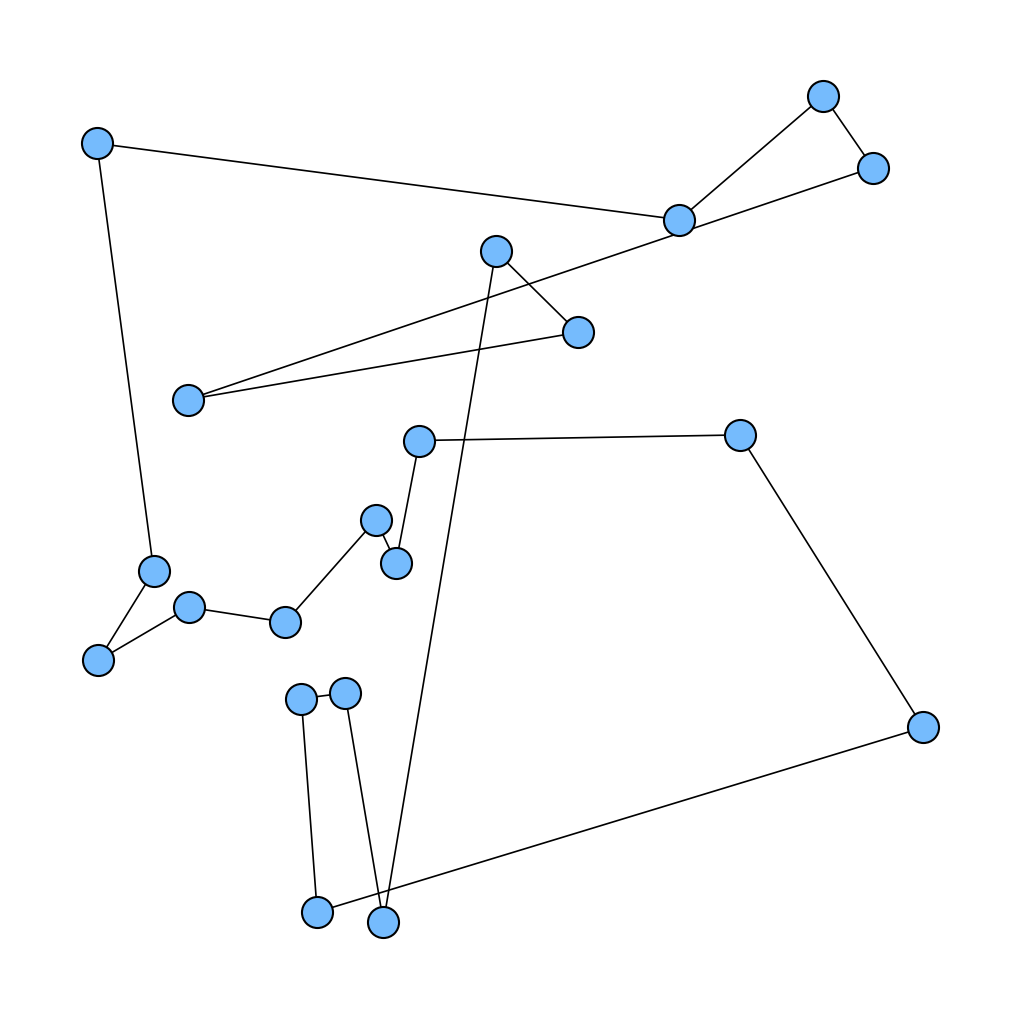

In [30]:
import random
import numpy as np
import os
from general.utils import draw_graph
import nest_asyncio
nest_asyncio.apply()

from problems.tsp.tsp_env_multibinary import TSPEnvironmentMultiBinary

BASE_PATH = "D:\\Coding\\University\\S7\\engineering-thesis"

TSP_DATA_DIR = os.path.join(BASE_PATH, "problems", "tsp", "data", "generated", "train")
TSP_VISUALIZATIONS_DIR = os.path.join(TSP_DATA_DIR, "visualizations")

problem_path = os.path.join(TSP_DATA_DIR, "20_1000_13.json")

TSP_SOLVERS_DIR = os.path.join(BASE_PATH, "problems", "tsp", "minizinc")
TSP_INIT_SOLVER_PATH = os.path.join(TSP_SOLVERS_DIR, "tsp_init_circuit.mzn")
TSP_REPAIR_SOLVER_PATH = os.path.join(TSP_SOLVERS_DIR, "tsp_repair_circuit.mzn")

env = TSPEnvironmentMultiBinary(problem_path, TSP_INIT_SOLVER_PATH, TSP_REPAIR_SOLVER_PATH)

random.seed(42)
np.random.seed(42)

_, _ = env.reset()
obs = env.step(env.action_space.sample_limited(k=5))[0]
obs = env.step(env.action_space.sample_limited(k=5))[0]

graph = env.preprocess(obs)
plt = draw_graph(graph, with_labels=False, node_color="xkcd:sky blue")

visualization_filename = os.path.basename(problem_path).rstrip(".json") + ".png"
print(visualization_filename)
plt.savefig(os.path.join(TSP_VISUALIZATIONS_DIR, visualization_filename))
plt.show()